# CAN I GET A LITTLE CREDIT? 
### An Exploration of Credit Worthiness
### Using Classification to Predict Serious Repayment Delinquency

-----

**Personal Project & Final Report Created By:** Rachel Robbins-Mayhill | April 27, 2022

---

<img src='loan_risk.png' width="1500" height="500" align="center"/>

## PROJECT DESCRIPTION

Banks play a crucial role in market economies. They decide who can get financing and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the methods banks use to determine whether or not a loan should be granted. This project aims to improve upon the state of the art in credit scoring, by predicting the probability that somebody will experience serious delinquency in the next two years. For the purpose of this project 'Serious Delinquency' is defined as being 90 days or more past due on payment. 

I am interested in this project because identifying at-risk borrower populations helps to protect the consumer, the business, the market, and society as a whole. Identifying borrowers who are at risk of default helps to prevent the consumer from entering into a situation that could be harmful to their long-term financial stability. It helps the banking institution prevent significant and costly losses which could impact business sustainability and limit the potential to help others. Lastly, as we saw with the housing crisis of 2008, accurately identifying at-risk loan borrowers can prevent the destabilizing of the market which can have far-reaching consequences for society as a whole.

## EXECUTIVE SUMMARY

## PROJECT GOAL

The goal of this report is to identify drivers of borrower serious delinquency and to build a model that can be used to help borrowers and banking institutions make the best financial decisions. 

## INITIAL THOUGHTS & HYPOTHESIS: 
The initial hypothesis of the project was that those with serious delinquency were younger, had lower monthly income, higher debt to income ratio, and a greater ratio of revolving unsecured line utilization. The thought behind this was younger people are at the beginning of their income trajectory within their professional lives, making less than those with more life/professional experience as they get older. Younger borrowers may still be learning to manage their finances and may take on more debt than reasonable given their financial situation. These thoughts and the subsequent hypothesis drove the initial exploratory questions for this project. 

## INITIAL QUESTIONS:
Data-Focused Questions

- Are borrowers in certain age groups more likely to be seriously delinquent?
- Are borrowers with lower monthly income more likely to be seriously delinquent?
- Are borrowers with higher debt to income ratio more likely to be seriously delinquent?
- Are borrowers with higher revolving unsecured line utilization more likely to be seriously delinquent?

=================================================================================================================================================================================================================================

## I. ACQUIRE

The data for this report was acquired by accessing the 'client_data.csv.'  The .csv provides historical data on 150,000 borrowers and it can be found in the 'Personal Project' repository on GitHub. The data acquisition for this project requires the .csv file of the data to be saved locally (in the same folder or repository where the work will be produced).  Once the .csv file has been saved locally, the data can be accessed using the get_client_data function saved within the wrangle.py file inside the 'Personal Project' repository on GitHub. This function acquires data from a local .csv file and returns a dataframe using pandas. The function informs the user of completion.

### Note about imports:

Imports for this project are added in the sections in which they are required.

In [1]:
# import for acquisition
import os
import wrangle

# import for data manipulation
import pandas as pd
import numpy as np

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire data from .csv using get_client_data function found in wrangle.py
df = wrangle.get_client_data()

Reading from .csv file.
Data acquisition complete.


In [3]:
# obtain number of columns and rows for original dataframe
df.shape

(150000, 12)

## The Original DataFrame Size: 150,000 rows, or observations, and 12 columns.

=================================================================================================================================================================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the wrangle_client function saved within the wrangle.py file inside the 'personal project' repository on GitHub. The function takes in the original client_data dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Delete "Unnamed' index
- Rename columns for understanding, while making lowercase for ease of understanding and coding through exploration
- Drop missing values (29_731 in monthly_income and 3_924 in quantity_dep) to prevent impediments in exploration and modeling 
- Create categorical columns for binning age and dependents in order to visualize and identify relationships more easily in exploration
- Manually scaled monthly income to include only those with monthly income below\\$15,000 to eliminate outliers

**Note on Missing Value Handling:**
The missing value removal equated to removing 29,731 observations, which was about 20\% of the data set. It still left a substantial number of observations, above 120,000. If given more time with the data, it is recommended to research ways to retain more of the observations through additional data collection or imputation of values.

**Note on Manual Scaling of Monthly Income:**
This decision was made after univariate exploration, to ensure the data explored represented the majority of borrowers, eliminating the monthly incomes up to \\$2 Million that would skew the data during exploration and modeling. It could be assumed that most people with significantly higher than average monthly income into the tens of thousands and up into the millions would be less likely to access borrower services. The monthly income variable was scaled at the dataframe level to be more useful in visualization. Therefore, the scaling applied to the train, validate, and test sets as well. 

---

### Results of Data Preparation

In [4]:
# apply the data preparation observations and tasks to clean the data using the wrangle_client function found in the wrangle.py
df = wrangle.wrangle_client(df)
# view first few rows of dataframe
df.head()

,serious_delinquency,revolv_unsec_utilization,age,quantity_30_59_pd,debt_to_income_ratio,monthly_income,quantity_loans_and_lines,quantity_90_days_pd,quantity_real_estate_loans,quantity_60_89_days_pd,quantity_dependents,age_bins,quantity_dependents_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,age_45-54,1_2_dep
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,age_35-44,1_2_dep
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,age_35-44,0_dep
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,age_25-34,0_dep
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,age_65-74,1_2_dep


In [5]:
# obtain the number of rows and columns for the updated/cleaned dataframe. 
df.shape

(114560, 13)

## Prepared DataFrame Size: 120,269 rows, 11 columns

----

### PREPARE - SPLIT

After preparing the data, it was split into 3 samples; train, validate, and test using:

- Random State: 123
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the wrangle.py file inside the 'personal project' repository on GitHub.




In [6]:
# split the data into train, validate, and test using the split_data function found in the wrangle.py
train, validate, test = wrangle.split_data(df)

train -> (64153, 13)
validate -> (27495, 13)
test -> (22912, 13)


==================================================================================================================================================================================================

## III. EXPLORE

After acquiring and preparing the data, exploration was conducted. All univariate exploration was completed on the entire cleaned dataset in the workbook for this project. For the purpose of the final report, only the target variable will be displayed in order to reduce noise and provide focused context for the project. Following univariate exploration, the data was split into train, validate, and test samples, where only the train set was used for bivariate and multivariate exploration to prevent data leakage.

In [7]:
# import for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

---

### UNIVARIATE EXPLORATION

#### UNIVARIATE EXPLORATION of TARGET VARIABLE: SERIOUS DELINQUENCY

0    106468
1      8092
Name: serious_delinquency, dtype: int64


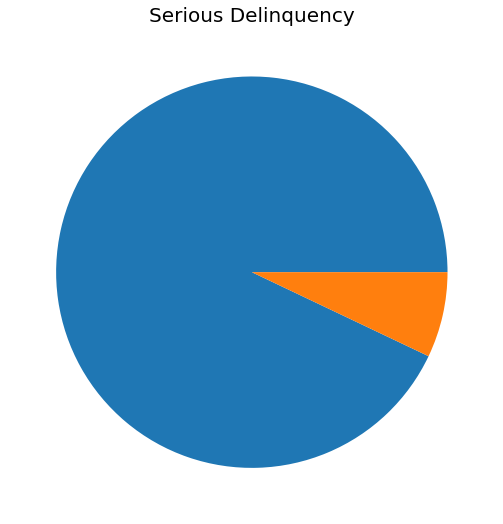

Percent Seriously Delinquent from Overall Dataset


0.071

In [8]:
# obtain counts of target variable and display them through print statement
print(df.serious_delinquency.value_counts())


# plot figure size
plt.figure(figsize=(15,9))
# define variable to plot
y = df.serious_delinquency.value_counts()
# format title and font
plt.title('Serious Delinquency', fontsize=20)
# create pie chart
plt.pie(y)
plt.show() 

# obtain percentage breakdown of target variable and round it to the nearest hundredth
print("Percent Seriously Delinquent from Overall Dataset")
round(df.serious_delinquency.mean(), 3)

**OBSERVATIONS:** 
Borrowers who are seriously delinquent make up 7% of the dataset. This indicates an imbalance within the dataset, which at this time will not be addressed due to the time constraints of this project. However, for future iterations, it is recommended the imbalance be addressed through downsampling.

#### UNIVARIATE EXPLORATION SUMMARY:

The following were takeaways from the univariate exploration section of the workbook. Only the takeaways are being included in this final report to keep the focus on the most pertinent information for the conclusion of this report. 

- Variable: quantity_90_days_pd 
    - Most have zero 90 days past due instances. 
    - 144 instances of being past due 98 times, seems unusual, compared to the other quanities. 
    - Consider binning 
    
- Variable: age
    - Most of the age data seems reasonable. 
    - There is one instance of age listed as 0, which would most likely be an input error, but 1 instance won't be impactful. 
    - Ages over 100, might seem unusual, but the quantities are not large or alarming. 
    - Most borrower ages are between 26 and 74, which seems reasonable.
    - I will not delete any age data, as there is not any alarming or drastically unusual data. 
    - Age was binned into age categories for ease of bivariate exploration('age_0-19', 'age_20_24','age_25-34', 'age_35-44', 'age_45-54', 'age_54-64', 'age_65-74', 'age_75-84', 'age_85-105')
    
- Variable: revolv_unsec_utilization (Revolving Unsecured Loan Utilization)

- Variable: monthly_income 

- Variable: debt_to_income_ratio 

- Variable: quantity_30_59_pd

- Variable: quantity_60_89_days_pd 

- Variable: quantity_real_estate_loans 

- Variable: quantity_dependents 
    - Most of the dependent data seems reasonable. 
    - There is one instance of depdendents listed as 13 and one of 20, which could be an data-entry error or could be accurate, but 1 instance of each won't be impactful.
    - Most are between 0 and 5, which seems reasonable.
    - I will not delete any dependent data, as there is not any alarming or drastically unusual data. 
    - Dependents were binned into age categories for ease of bivariate exploration (0), (1-2), (3-4), (5-6), (7 or more)
  

---

### BIVARIATE EXPLORATION

All bivariate exploration was conducted on the train dataset to prevent data leakage. The initial questions and univariate exploration guided the bivariate exploration.

#### EXPLORE QUESTIONS

- 1. Are borrowers in certain age groups more likely to be seriously delinquent?
- 2. Is monthly income for borrowers with serious delinquency significantly different from monthly income for those who are not seriously delinquent?
- 3. Is debt to income ratio for borrowers with serious delinquency significantly different from debt to income ratio for those who are not seriously delinquent?
- 4. Is revolving unsecured line utilization for borrowers with serious delinquency significantly different from revolving unsecured line utilization for those who are not seriously delinquent?

---

### QUESTION 1: AGE
### Are borrowers in certain age groups more likely to be seriously delinquent?

In order to answer this question, the age variable has been feature engineered into categorical bins to see patterns in ages related to serious delinquency.

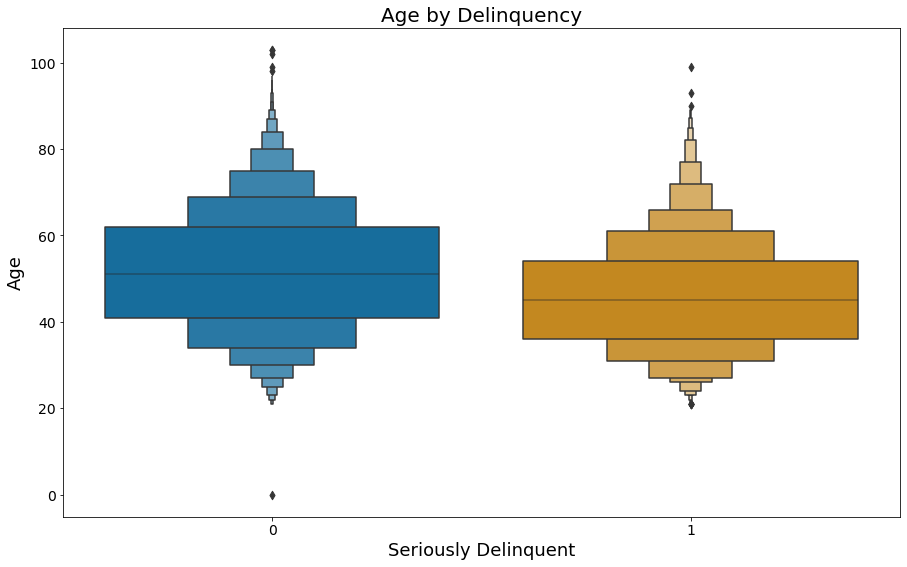

In [9]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
# plot figure size
plt.figure(figsize=(15,9))
# designate labels for x axis features
labels = ['No Serious Delinquency', 'Serious Delinquency']
# create boxenplot
sns.boxenplot(x='serious_delinquency',y='age',data=train, palette='colorblind')
# format title
plt.title("Age by Delinquency", fontsize=20)
# format x label title and font
plt.xlabel('Seriously Delinquent', fontsize=18) 
# format x tick font
plt.xticks(fontsize=14)
# format y label title and font
plt.ylabel('Age', fontsize=18) 
# format y tick font
plt.yticks(fontsize=14)
plt.show()

**Observation:** Those who are seriously delinquent tend to be younger than those who are not. Binning and a countpot will be used to try to determine where most seriously delinquent borrrowers fall within the age category. 

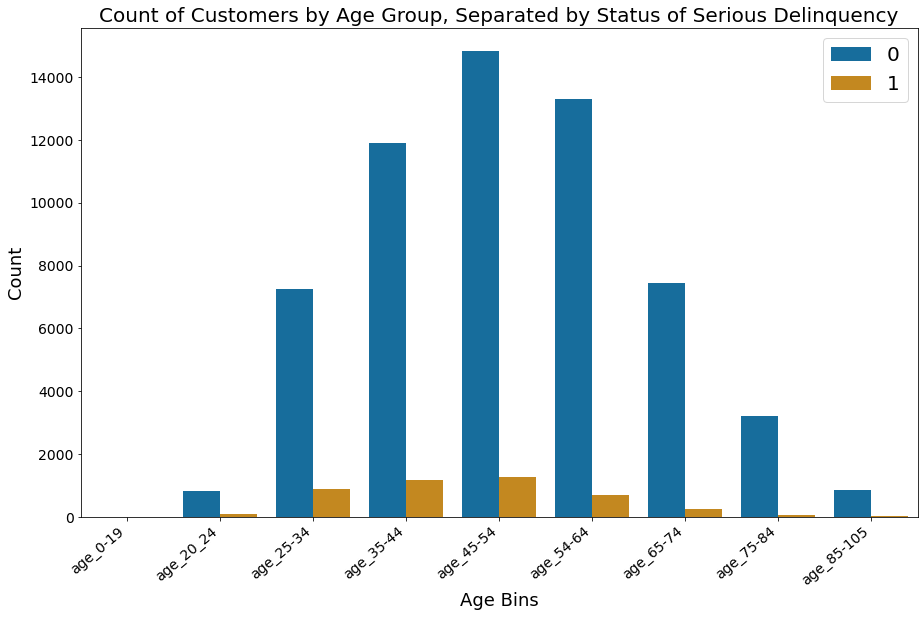

In [10]:
# Create visualization with designated size, title, x label, y label, and font size. 
# plot figure size
plt.figure(figsize=(15,9))
# create countplot
sns.countplot(x='age_bins', hue='serious_delinquency', data=train, palette='colorblind')
# format title
plt.title("Count of Customers by Age Group, Separated by Status of Serious Delinquency", fontsize=20)
# format x label title and font
plt.xlabel('Age Bins', fontsize=18) 
# format x tick font
plt.xticks(fontsize=14, rotation= 40, ha='right')
# format y label title and font
plt.ylabel('Count', fontsize=18) 
# format y tick font
plt.yticks(fontsize=14)
# format legend font
plt.legend(fontsize=20)
plt.show()

The ratio of serious delinquency will help to define the age bins that have a greater percentage of serious delinquency observations in comparison to the number of applications. 

In [11]:
# obtain ratio of serious delinquency per age group
train.groupby('age_bins').serious_delinquency.mean().sort_values(ascending=False)

age_bins
age_25-34     0.109924
age_35-44     0.091298
age_20_24     0.091008
age_45-54     0.080047
age_54-64     0.051128
age_65-74     0.032568
age_85-105    0.022805
age_75-84     0.021845
age_0-19           NaN
Name: serious_delinquency, dtype: float64

**Observation:** It appears through the visualization that serious delinquency occurs more frequently between 25 and 45 years old. As previously noted, there is about a 7% serious delinquency rate within this data set. When looking at the ratio of delinquency between the age groups, ages 20-24 (9%), 25-34 (11%), and 35-44(9%) all have above average ratios of serious delinquency. Statistical testing will be conducted to verify statistical relevance of observations. 

### Statistical Testing

Chi^2 Statistical Testing will be conducted because the variables age bins and serious delinquency are both categorical/discrete.

Hypothesis:
- H$_{0}$: Serious Delinquency is independent of age. 
- H$_{a}$: Serious Delinquency is NOT independent of age.

In [12]:
# import for Hypothesis Testing
import scipy.stats as stats

# set alpha
alpha= 0.05

# conduct chi^2 statistical test
observed = pd.crosstab(train['age_bins'], train.serious_delinquency)
chi2, p, degf, expected = stats.chi2_contingency(observed)

# obtain test statistics through a print statement
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

# determine outcome of stats testing
if p < alpha:
    print("We reject the null hypothesis, our data is statistically relevant.")
else:
    print("We fail to reject the null hypothesis.")

chi^2 = 706.8000
p     = 0.0000
We reject the null hypothesis, our data is statistically relevant.


### ANSWER 1: AGE
Yes, according to visualizations, summary statistics, and verified as statistically relevent through statistical testing, we can say borrowers in certain age groups are more likely to be seriously delinquent, particulary those between the ages of 20 and 44. 

---

---

### QUESTION 2: Monthly Income
### Is monthly income for borrowers with serious delinquency significantly different from monthly income for those who are not seriously delinquent?

In order to answer this question, the monthly income variable was manually scaled to represent a monthly income that is more expected from those seeking credit. The dataset included observations for only those with monthly_income at \\$15, 000 or less.

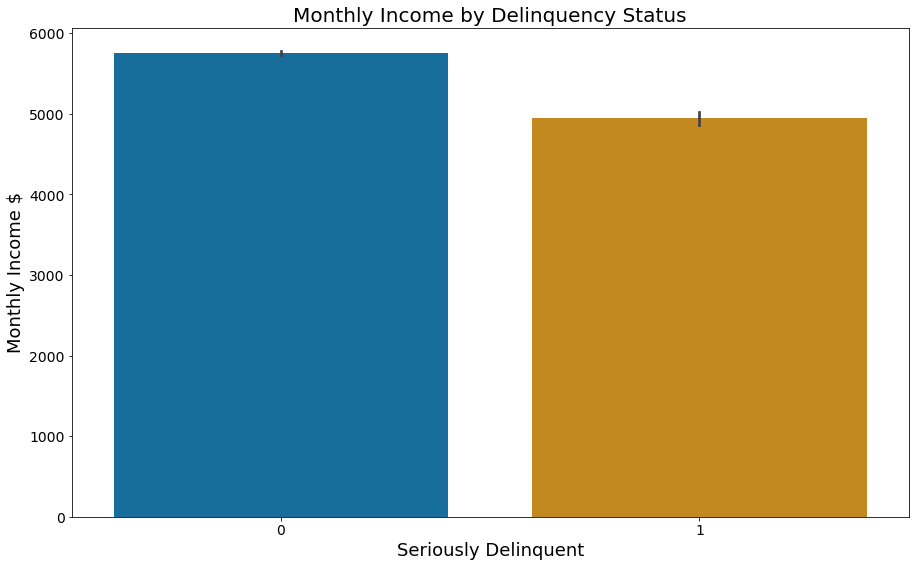

In [13]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
sns.barplot(data = train, y = 'monthly_income', x = 'serious_delinquency', palette='colorblind')
#sns.boxplot(x='serious_delinquency',y='monthly_income',data=train, palette='colorblind')
plt.title("Monthly Income by Delinquency Status", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Monthly Income $', fontsize=18) 
plt.yticks(fontsize=14)
plt.show()

In [14]:
# Obtain average monthly income for those who are seriously delinquent and those who are not. 
train.groupby(['serious_delinquency']).monthly_income.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,5756.197434,14999.0
1,0.0,4943.006191,14932.0


**Observation:** It appears through the visualization and summary statistics that serious delinquency occurs more frequently for those with lower monthly incomes. When looking at the mean monthly income for those with serious delinquency, it is about \\$800 less than those without serious delinquency. Statistical testing will be conducted to verify statistical relevance of observations. 

---

### Statistical Testing
T-Test (2 Tailed) Statistical Testing  will be conducted because we are using the mean of monthly income for each category of delinquency (a mean of a subgroup vs. a mean of a subgroup) and comparing whether they are significantly different.

- H$_{0}$: Mean of monthly income of seriously delinquent borrowers == Mean of monthly income of borrowers who are not seriously delinquent. 
- H$_{a}$: Mean of monthly income of seriously delinquent borrowers != Mean of monthly income of borrowers who are not seriously delinquent.

In [15]:
# Set variables for features being used in the hypothesis test. For t-test, use the mean for the features.
delinquent_sample = train[train.serious_delinquency == 1].monthly_income
no_delinquent_sample = train[train.serious_delinquency == 0].monthly_income

# Compare variance to verify assumptions for statistical testing 
print(delinquent_sample.var())
print(no_delinquent_sample.var())

8144981.938042171
10359135.66235622


- The variance is not equal, which will need to be annotated in the hypothesis testing code to run a Welch's t-test.

In [16]:
# Set Alpha
alpha = 0.05

# Compute test statistic and probability
t, p = stats.ttest_ind(delinquent_sample, no_delinquent_sample, equal_var=False)

# Obtain test statistics through a print statement
print(t, p, alpha)

# Evaluate outcome of statistical testing
if p < alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

-18.30047745186004 1.2035127124174728e-72 0.05
We fail to reject $H_{0}$


#### Outcome of statistical testing
We failed to reject the null hypothesis that the mean of monthly income of seriously delinquent borrowers == mean of monthly charges of borrowers who are not seriously delinquent, which means our observation could be due to chance. It could be possible the relationship between monthly income and serious delinquency as visualized, truly doesn’t exist in the population, which is why the hypothesis test didn’t detect it in the sample. Another possibility is that the relationship between monthly income and serious delinquency as visualized exists in the population, but the test didn’t detect it for a variety of reasons. These reasons include the following:

- The sample size was too small to detect the effect, perhaps due to imbalance. Downsampling could provide a different outcome, which we could contuct as next steps.
- The variability in the data was too high. The effect exists, but noise in the data swamped the signal (effect).
- By chance, the data collected is a fluky sample. When dealing with random samples, chance always plays a role in the results. The luck of the draw might have caused the sample not to reflect an effect that exists in the population.

Based on all of the possibilities, we can say statistical testing resulted in failure to reject the null hypothesis. 

### ANSWER 2: MONTHLY INCOME
We can NOT say for sure whether monthly income for borrowers with serious delinquency is significantly different from monthly income for those who are not seriously delinquent. According to visualizations and summary statistics, borrowers with lower monthly income are more likely to be seriously delinquent than those with average monthly income of \\$5700. However, statistical testing did not identify a consequential relationship between average monthly income and serious delinquency. 

---

---

## QUESTION 3:Debt to Income Ratio
### Is debt to income ratio for borrowers with serious delinquency significantly different from debt to income ratio for those who are not seriously delinquent?

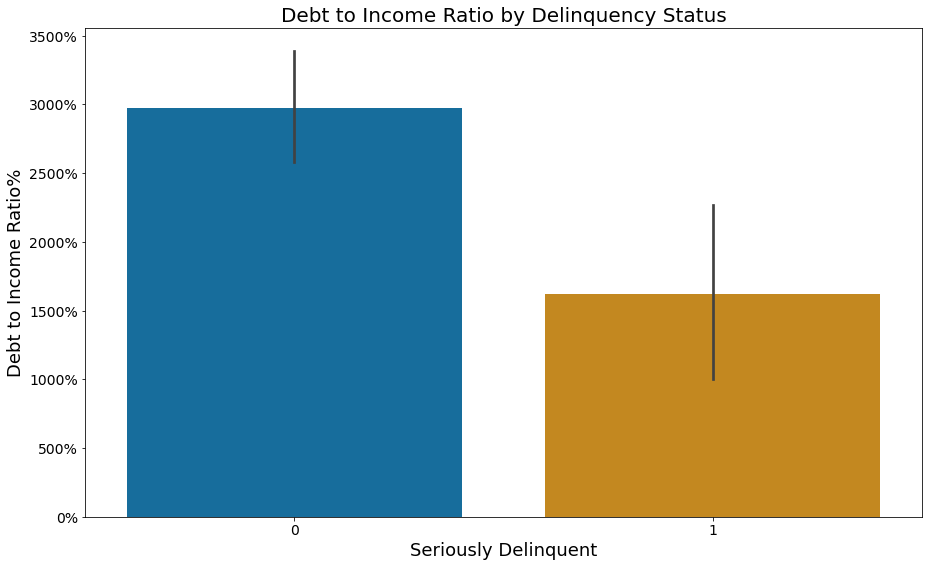

In [17]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
ax = sns.barplot(data = train, y = 'debt_to_income_ratio', x = 'serious_delinquency', palette='colorblind')
plt.title("Debt to Income Ratio by Delinquency Status", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Debt to Income Ratio%', fontsize=18) 
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.000%}'))
plt.yticks(fontsize=14)
plt.show()

In [18]:
# Obtain average debt to income ratio for those who are seriously delinquent and those who are not. 
train.groupby(['serious_delinquency']).debt_to_income_ratio.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,29.700021,61106.5
1,0.0,16.215666,5774.5


---

### Statistical Testing
T-Test (2 Tailed) Statistical Testing  will be conducted because we are using the mean of debt to income ratio for each category of delinquency (a mean of a subgroup vs. a mean of a subgroup) and comparing whether they are significantly different.

- H$_{0}$: Mean of of debt to income ratio of seriously delinquent borrowers == Mean of of debt to income ratio of borrowers who are not seriously delinquent. 
- H$_{a}$: Mean of of debt to income ratio of seriously delinquent borrowers != Mean of of debt to income ratio of borrowers who are not seriously delinquent.

In [19]:
# Set variables for features being used in the hypothesis test. For t-test, use the mean for the features.
delinquent_sample = train[train.serious_delinquency == 1].debt_to_income_ratio
no_delinquent_sample = train[train.serious_delinquency == 0].debt_to_income_ratio

# Compare variance to verify assumptions for statistical testing 
print(delinquent_sample.var())
print(no_delinquent_sample.var())

51166.25954738362
272006.1845014788


- The variance is not equal, which will need to be annotated in the hypothesis testing code.

In [20]:
# Set Alpha
alpha = 0.05

# Compute test statistic and probability
t, p = stats.ttest_ind(delinquent_sample, no_delinquent_sample, equal_var=False)

# Obtain test statistics through a print statement
print(t, p, alpha)

# Evaluate outcome of statistical testing
if p < alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

-3.384438444241141 0.0007163568930883903 0.05
We fail to reject $H_{0}$


### ANSWER 3: DEBT TO INCOME RATIO
We can NOT say for sure whether debt to income ratio for borrowers with serious delinquency is significantly different from debt to income ratio for those who are not seriously delinquent. According to visualizations and summary statistics, borrowers with lower debt to income ratio are more likely to be seriously delinquent than those with average debt to income ratio of 29\%. However, statistical testing did not identify a consequential relationship between average debt to income ratio and serious delinquency. 

---

---

## QUESTION 4: Revolving Unsecured Line Utilization
### Is revolving unsecured line utilization for borrowers with serious delinquency significantly different from revolving unsecured line utilization for those who are not seriously delinquent?

For the purpose of this data, revolving unsecured line utilization is the total balance on credit cards and personal lines of credit divided by the sum of credit limits. It does not include real estate and it does not include installment debt, like car loans.

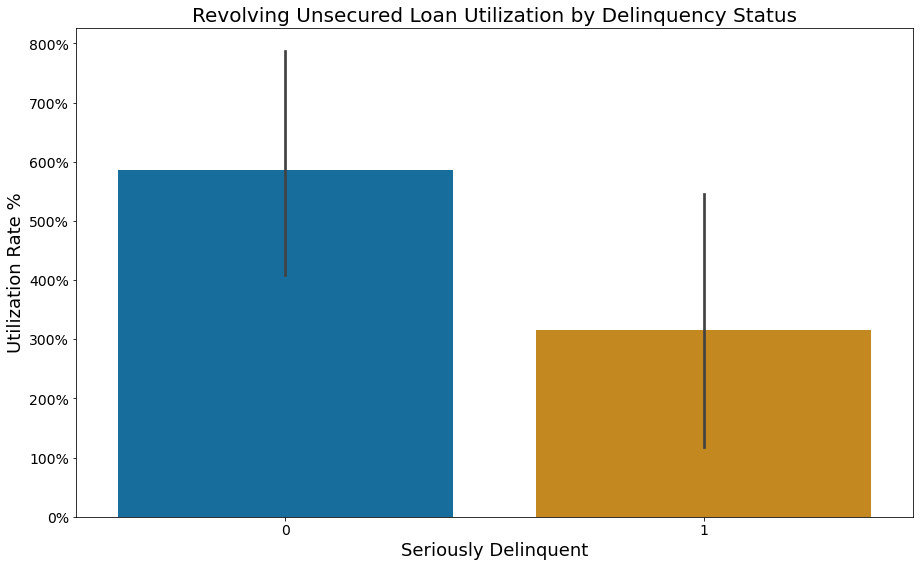

In [21]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
ax = sns.barplot(data = train, y = 'revolv_unsec_utilization', x = 'serious_delinquency', palette='colorblind')
plt.title("Revolving Unsecured Loan Utilization by Delinquency Status", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Utilization Rate %', fontsize=18) 
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.000%}'))
plt.yticks(fontsize=14)
plt.show()

In [22]:
# Obtain average revolving unsecured utilization rate for those who are seriously delinquent and those who are not. 
train.groupby(['serious_delinquency']).revolv_unsec_utilization.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,5.864567,29110.0
1,0.0,3.153037,3572.0


---

### Statistical Testing
T-Test (2 Tailed) Statistical Testing  will be conducted because we are using the mean of revolving unsecured line utilization for each category of delinquency (a mean of a subgroup vs. a mean of a subgroup) and comparing whether they are significantly different.

- H$_{0}$: Mean rate of revolving unsecured line utilization of seriously delinquent borrowers > Mean rate of revolving unsecured line utilization of borrowers who are not seriously delinquent. 
- H$_{a}$: Mean of revolving unsecured line utilizationof seriously delinquent borrowers <= Mean rate of revolving unsecured line utilization of borrowers who are not seriously delinquent.

In [23]:
# Set variables for features being used in the hypothesis test. For t-test, use the mean for the features.
delinquent_sample = train[train.serious_delinquency == 1].revolv_unsec_utilization
no_delinquent_sample = train[train.serious_delinquency == 0].revolv_unsec_utilization

# Compare variance to verify assumptions for statistical testing 
print(delinquent_sample.var())
print(no_delinquent_sample.var())

6072.036413841905
58649.49784731927


In [24]:
# Set Alpha
alpha = 0.05

# Compute test statistic and probability
t, p = stats.ttest_ind(delinquent_sample, no_delinquent_sample, equal_var=False)

# Obtain test statistics through a print statement
print(t, p, alpha)

# Evaluate outcome of statistical testing
if p < alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

-1.7778946489412928 0.07544444945948796 0.05
We reject $H_{0}$


## ANSWER 4: Revolving Unsecured Line Utilization

Yes, according to visualizations, summary statistics, and verified as statistically relevent through statistical testing, we can say revolving unsecured line utilization for borrowers with serious delinquency is significantly different from revolving unsecured line utilization for those who are not seriously delinquent. In fact, it is lower for those with serious delinquency. Those with serious delinquency have an average revolving unsecured line utilization of 315\%, over 250\% lower than those with no serious delinquency.


---

### EXPLORATION SUMMARY

Exploration revealed the feature of age was a driver of serious delinquency, indicating borrowers in certain age groups are more likely to be seriously delinquent, particulary those between the ages of 20 and 44. Interestingly, revolving unsecured line utilization rate is lower for borrowers with serious delinquency. This could be because they are not able to access as much credit if they have a history of delinquency. 

Two features, monthly income and debt to income ratio, appeared to be visually and statistically significantly different for those with serious delinquency, but statistical testing did not confirm a realtionship. Given there could be many reasons for this to include sample size, we will do some modeling with the features included and some modeling without these features.  

Interestingly, revolving unsecured line utilization rate is lower for borrowers with serious delinquency. This could be because they are not able to access as much credit if they have a history of delinquency.  


#### 1. Are borrowers in certain age groups more likely to be seriously delinquent?

Yes, according to visualizations, summary statistics, and verified as statistically relevent through statistical testing, we can say borrowers in certain age groups are more likely to be seriously delinquent, particulary those between the ages of 20 and 44. 

---
    
#### 2. Is monthly income for borrowers with serious delinquency significantly different from monthly income for those who are not seriously delinquent?

We can NOT say for sure whether monthly income for borrowers with serious delinquency is significantly different from monthly income for those who are not seriously delinquent. According to visualizations and summary statistics, borrowers with lower monthly income are more likely to be seriously delinquent than those with average monthly income of \\$5700. However, statistical testing did not identify a consequential relationship between average monthly income and serious delinquency. 
 
---
    
#### 3. Is debt to income ratio for borrowers with serious delinquency significantly different from debt to income ratio for those who are not seriously delinquent?

We can NOT say for sure whether debt to income ratio for borrowers with serious delinquency is significantly different from debt to income ratio for those who are not seriously delinquent. According to visualizations and summary statistics, borrowers with lower debt to income ratio are more likely to be seriously delinquent than those with average debt to income ratio of 29\%. However, statistical testing did not identify a consequential relationship between average debt to income ratio and serious delinquency. 
 
---
    
#### 4. Is revolving unsecured line utilization for borrowers with serious delinquency significantly different from revolving unsecured line utilization for those who are not seriously delinquent?

Yes, according to visualizations, summary statistics, and verified as statistically relevent through statistical testing, we can say revolving unsecured line utilization for borrowers with serious delinquency is significantly different from revolving unsecured line utilization for those who are not seriously delinquent. In fact, it is lower for those with serious delinquency. Those with serious delinquency have an average revolving unsecured line utilization of 315\%, over 250\% lower than those with no serious delinquency.. 

===================================================================================================================================

## IV. MODEL

In [25]:
# Import for modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Because serious delinquency is a yes or no (boolean) value, classification machine learning algorithms were used to fit to the training data and the models were evaluated on validate data. The best model was selected using accuracy, because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong. In other words, the model was optimized for identifying true positives (actual delinquency when predicted), and true negatives (no serious delinquency when predicted), while minimizing false positive and false negatives.

### MODEL - SCALE
As previously mentioned, scaling was done manually to monthly income inside the prep function. Monthly income was scaled to include only observations below \\$15,000 to be more in line with the typical borrower. By including only the observations noted, 95\\% of the data was still retained. No other scaling was conducted at this time.

### Set X & y

In [26]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train = train.drop(columns=['serious_delinquency','quantity_90_days_pd', 'age_bins', 'quantity_dependents_bins'])
y_train = train.serious_delinquency

X_validate = validate.drop(columns=['serious_delinquency', 'quantity_90_days_pd', 'age_bins', 'quantity_dependents_bins'])
y_validate = validate.serious_delinquency

X_test = test.drop(columns=['serious_delinquency', 'quantity_90_days_pd', 'age_bins', 'quantity_dependents_bins'])
y_test = test.serious_delinquency

### Set Baseline

A baseline prediction was set by predicting all customers will not have serious_delinquency (serious delinquency == 0). I will evaluate the accuracy of that.

In [48]:
# Obtain the mode for the target
baseline = y_train.mode()

# produce boolean array with True assigned to match the baseline prediction and real data. 
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 92.95%


#### The 3 models built were 
- Decision Tree - As viewed in workbook
- Random Forest
- Logistic Regression - As viewed in workbook

The models were run with many trials, adjusting parameters and algorithms to find the best performing model.  

- None of these model appeared to be overfit.

- The Random Forest Model that performed best had ____ samples_per_leaf and max_depth of ____, with train accuracy of _____and validate accuracy of _____ performing _____ better than baseline with validate. 
    - A ____improvement improvement from the baseline.

- it was then applied to the un-seen test data.

### MODEL - DECISION TREE

In [28]:
#Create the object
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)
# Fit the model
clf1 = clf1.fit(X_train, y_train)

[Text(0.5, 0.8333333333333334, 'quantity_60_89_days_pd <= 0.5\ngini = 0.131\nsamples = 64153\nvalue = [59630, 4523]'),
 Text(0.25, 0.5, 'revolv_unsec_utilization <= 0.533\ngini = 0.103\nsamples = 60773\nvalue = [57465, 3308]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.051\nsamples = 45377\nvalue = [44198, 1179]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.238\nsamples = 15396\nvalue = [13267, 2129]'),
 Text(0.75, 0.5, 'revolv_unsec_utilization <= 0.599\ngini = 0.461\nsamples = 3380\nvalue = [2165, 1215]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.329\nsamples = 1299\nvalue = [1029, 270]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.496\nsamples = 2081\nvalue = [1136, 945]')]

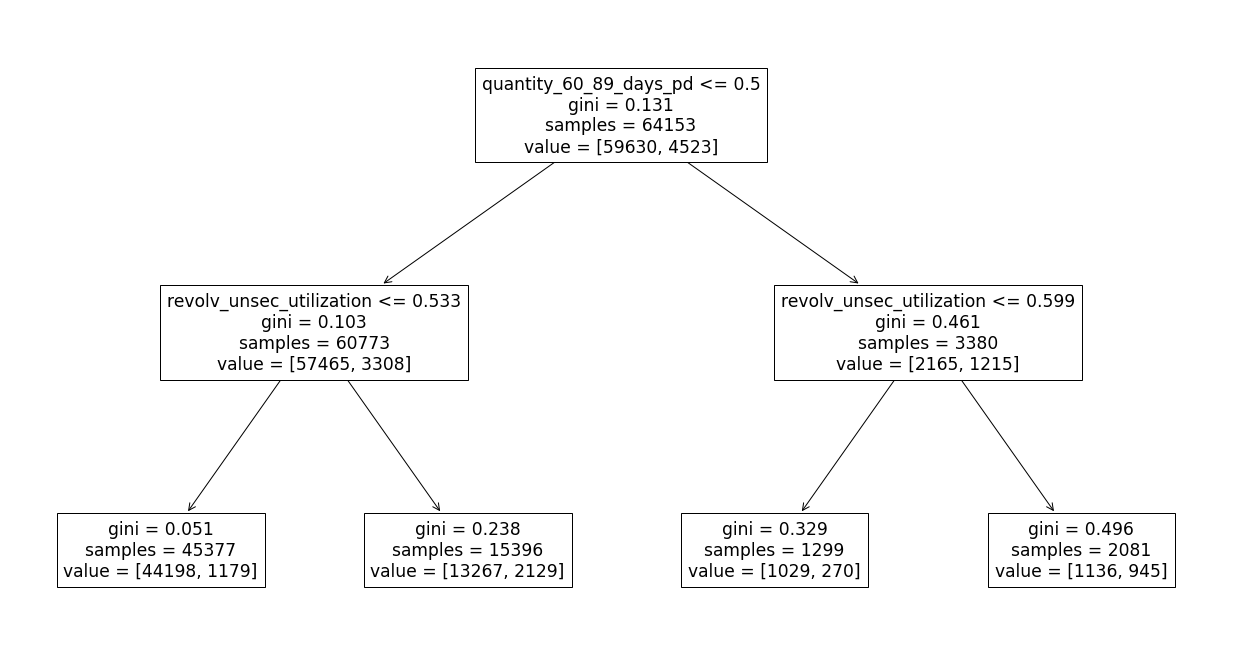

In [29]:
#Visualize the model
plt.figure(figsize=(22, 12))
plot_tree(clf1,feature_names=X_train.columns)

In [30]:
# make predictions
y_pred = clf1.predict(X_train)

In [31]:
y_pred_proba = clf1.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns = ['Not Seriously Delinquent', 'Seriously Delinquent']).head()

,Not Seriously Delinquent,Seriously Delinquent
0,0.974018,0.025982
1,0.861717,0.138283
2,0.974018,0.025982
3,0.974018,0.025982
4,0.974018,0.025982


### Evaluate Model

In [32]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.93


### Create a Confusion Matrix
- True Positive: number of occurrences where serious delinquency is true and serious delinquency is predicted true.
- True Negative: number of occurrences where serious delinquency is false and serious delinquency is predicted false.
- False Positive: number of occurrences where serious delinquency is false and serious delinquency is predicted true.
- False Negative: number of occurrences where serious delinquency is true and serious delinquency is predicted false.

In [33]:
confusion_matrix(y_train, y_pred)

array([[59630,     0],
       [ 4523,     0]])

In [34]:
confusion_matrix(y_train, y_pred)

array([[59630,     0],
       [ 4523,     0]])

In [35]:
y_train.value_counts()

0    59630
1     4523
Name: serious_delinquency, dtype: int64

In [36]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,59630,0
1,4523,0


### Create a Classification Report
- Acuracy isn't everything, look at other evaluation metrics, such as recalll and precision.

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     59630
           1       0.00      0.00      0.00      4523

    accuracy                           0.93     64153
   macro avg       0.46      0.50      0.48     64153
weighted avg       0.86      0.93      0.90     64153



### Evaluate the Model with our Validate dataset

In [38]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.93


In [39]:
# Produce y_predictions that come from the X_validate
y_pred = clf1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     25566
           1       0.00      0.00      0.00      1929

    accuracy                           0.93     27495
   macro avg       0.46      0.50      0.48     27495
weighted avg       0.86      0.93      0.90     27495



### Model - RANDOM FOREST

In [40]:
# Evaluate Random Forest models on train & validate set 
# by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    forest = forest.fit(X_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.929497,0.929842,-0.000345
1,2,2,0.929497,0.929842,-0.000345
2,3,3,0.929497,0.929842,-0.000345
3,4,4,0.931227,0.931115,0.000112
4,5,5,0.931913,0.931624,0.000289
5,6,6,0.933347,0.932242,0.001105
6,7,7,0.934157,0.931806,0.002352
7,8,8,0.935436,0.932606,0.002830
8,9,9,0.935950,0.932679,0.003271
9,10,10,0.937026,0.932242,0.004783


In [41]:
# The Random Forest model that performed the best on train & validate set had max_depth of 12 and min_sample_leaf of 12. 
# Isolating that model to use as best performing model. 

# define the model setting hyperparameters to values for the best performing model
forest = RandomForestClassifier(max_depth=13, min_samples_leaf=13, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy: 2%}')
print(f'validate_accuracy: {validate_accuracy: 2%}')

train_accuracy:  93.768023%
validate_accuracy:  93.249682%


### Model - LOGISTIC REGRESSION

In [42]:
# Evaluate Logistic Regression models on train & validate set by looping through different values for c hyperparameter

# create empty list for which to append metrics from each loop
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
            
    # define the model setting hyperparameters to values for current loop
    logit = LogisticRegression(C=c)
    
    # fit the model on train
    logit.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = logit.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = logit.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)

# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(metrics)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,C,train_accuracy,validate_accuracy,difference
0,0.001,0.929653,0.929987,-0.000335
1,0.005,0.929668,0.929915,-0.000246
2,0.010,0.929668,0.929987,-0.000319
3,0.050,0.929497,0.929733,-0.000236
4,0.100,0.929575,0.929842,-0.000267
5,0.500,0.929637,0.930024,-0.000387
6,1.000,0.929653,0.929987,-0.000335
7,5.000,0.929575,0.929805,-0.000231
8,10.000,0.929481,0.929842,-0.000361
9,50.000,0.929668,0.929987,-0.000319


In [43]:
# Feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.000206   -0.04731319  0.07868075 -0.00049153 -0.00011551  0.03176106
   0.03493758 -0.04198021  0.04054895]]
Intercept: 
 [-0.02364445]


In [44]:
#Make Probability
y_pred = logit.predict(X_train)

In [45]:
# Estimate Predictions
y_pred_proba = logit.predict_proba(X_train)

Evaluate the Model with Our Validate Set
Done in Function above
The Logistic Regression Model that performed best had a c-statistic of 0.1 with a train accuracy of 93.0% and validate accuracy of 93.0.% performing nearly the same as baseline on unseen (validate) data.`m

### Create a Confusion Matrix
- True Positive: number of occurrences where churn is true and churn is predicted true.
- True Negative: number of occurrences where churn is false and churn is predicted false.
- False Positive: number of occurrences where churn is false and churn is predicted true.
- False Negative: number of occurrences where churn is true and churn is predicted false.

In [46]:
print(confusion_matrix(y_train, y_pred))

[[59591    39]
 [ 4474    49]]


Create Classification Report
Acuracy isn't everything, look at other evaluation metrics, such as recalll and precision.

In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     59630
           1       0.56      0.01      0.02      4523

    accuracy                           0.93     64153
   macro avg       0.74      0.51      0.49     64153
weighted avg       0.90      0.93      0.90     64153



### Best Model Overall
- The best performing model overall was the _, performing _ on train, __ on validate, and optimized for ___.
- This model will now be used on the test data to confirm best performance.

=========================================================================================================================================================================================

## V. CONCLUSION

The goal of this report was to identify drivers of borrower serious delinquency and to build a model that could be used to help borrowers and banking institutions make the best financial decisions.  
Through the process of data acquisition, preparation, exploration, and statistical testing, it was determined borrowers more at-risk of serious delinquency are borrowers: 

- between the ages of 20 and 40
- who have an average monthly income of \\$4900, which is about \\$800 lower than those who are not seriously delinquent  
- who have an average debt to income ratio of 16\%, 13\% lower than those who are not seriously delinquent
- who have an average revolving credit utilization rate of 315\%, over 250\% **lower** than those who are not seriously delinquent

By using machine learning modeling, predictions to prevent serious delinquency were made with ___ accuracy within the best performing model. 


to be useful in developing mechanisms within marketing and customer retention teams to prevent churn in high-risk customer groups. 

### RECOMMENDATIONS

### NEXT STEPS

If given more time, I would like to:

- Eliminate more outliers and scale further aspects of the data to produce more accurate modeling/predictions.

- Downsample to decrease the quantity of the majority class (no serious delinquency) in order to better see the impact of features on the target.

- Identify more precise populations within the data that have serious delinquency. For instance, I would like to investigate:
    - the 144 observations that have over 98 occurrences of serious delinquency.
    - the relationship between intermediate delinquencies (30 days, 60 days) and the target.

===================================================================================================================================

## V. CONCLUSION

### RECOMMENDATIONS

### NEXT STEPS